# Desafío 1
## Grupo 3: Eyal Brenner, Lucía De Zan, Inés Díaz Bessone, Rodrigo Díaz Bessone, Carlos Pereiro

# 1. Análisis inicial de Properatti:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import unidecode
import re
df = pd.read_csv("properatti.csv")
df1 = pd.read_csv("properatti_minusculas.csv") # el data frame ya habiendo corrido la funcion que pasa todo a minusculas


In [2]:
import seaborn as sns
sns.set(style="white")

In [3]:
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Para sacar la notacion cientifica

In [5]:
df.shape

(121220, 26)

In [6]:
df.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.000,"-34.6618237,-58.5088387",-34.662,-58.509,62000.000,USD,1093959.000,62000.000,55.000,40.000,1127.273,1550.000,nan,nan,nan,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.000,"-34.9038831,-57.9643295",-34.904,-57.964,150000.000,USD,2646675.000,150000.000,nan,nan,nan,nan,nan,nan,nan,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.000,"-34.6522615,-58.5229825",-34.652,-58.523,72000.000,USD,1270404.000,72000.000,55.000,55.000,1309.091,1309.091,nan,nan,nan,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.000,"-34.6477969,-58.5164244",-34.648,-58.516,95000.000,USD,1676227.500,95000.000,nan,nan,nan,nan,nan,nan,nan,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.000,"-38.0026256,-57.5494468",-38.003,-57.549,64000.000,USD,1129248.000,64000.000,35.000,35.000,1828.571,1828.571,nan,nan,nan,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


## Nulos :

Hacemos un recorrido por cada columna en su estado original.

In [8]:
#Hacemos un Data Frame que tenga en una columna todas las columnas de df y en otras dos columnas la cantidad de 
#nulos y el porcentaje de los mismos sobre el total de observaciones
Col = df.columns.values #Sacamos los nombres de las columnas como una Lista
Nul = df.isnull().sum().values #Sacamos la suma de los nulos en formato de Lista
Nulp = np.around(((df.isnull().sum()/121220)*100).values, decimals = 3) #Sacamos el % de los nulos
ListaTup = list(zip(Col, Nul, Nulp)) #Compaginamos las tres listas de arriba 
ResNul = pd.DataFrame(ListaTup, columns = ['Columnas', 'Nulos', 'Nulos %']) #Armamos un df a partir de las listas compaginadas
ResNul.index += 1 #Aumentamos en 1 el indice para ver claro cuantas columnas hay
ResNul

,Columnas,Nulos,Nulos %
1,Unnamed: 0,0,0.000
2,operation,0,0.000
3,property_type,0,0.000
4,place_name,23,0.019
5,place_with_parent_names,0,0.000
6,country_name,0,0.000
7,state_name,0,0.000
8,geonames_id,18717,15.441
9,lat-lon,51550,42.526
10,lat,51550,42.526


A partir de este punto analizamos cada columna por separado y decidimos si aportan datos de interés:

### Unnamed: 0 :

Es un índice común y corriente y va desde 0 a los 121219. Sin embargo, es información que ya tenemos en el índice del propio DataFrame, por lo tanto lo dropeamos

In [9]:
df['Unnamed: 0'].describe()

count   121220.000
mean     60609.500
std      34993.344
min          0.000
25%      30304.750
50%      60609.500
75%      90914.250
max     121219.000
Name: Unnamed: 0, dtype: float64

In [10]:
df = df.drop(columns="Unnamed: 0")

### operation :

Es una columna que contiene el tipo de operación a realizar (venta o alquiler). En esta base de datos solo figuran operaciones de venta

In [11]:
df['operation'].value_counts()

sell    121220
Name: operation, dtype: int64

### property_type :

En esta columna contamos con los distintos tipos de propiedad, no se ven nulls a primera vista:

In [12]:
df['property_type'].value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: property_type, dtype: int64

### place_name :

En esta columna vamos a encontrar los barrios o ciudades en la que se encuentra la propiedad

In [13]:
# Queremos ver cuantas propiedades hay en cada Barrio
df['place_name'].value_counts()

Córdoba                           9254
Rosario                           8504
Mar del Plata                     6534
Tigre                             3324
Nordelta                          3315
Belgrano                          2992
Palermo                           2885
La Plata                          2534
Caballito                         2273
Pilar                             2228
Villa Urquiza                     1632
Olivos                            1590
Recoleta                          1547
Lomas de Zamora                   1529
Flores                            1354
Ituzaingó                         1340
Villa Crespo                      1331
Capital Federal                   1297
San Telmo                         1216
Morón                             1209
Almagro                           1165
Barrio Norte                      1140
Ramos Mejía                       1127
Martínez                          1058
Lanús                             1048
Escobar                  

Ya habiamos observado que habia 23 nulls en esta variable

### place_with_parent_names :

Esta columna contiene la acumulación total de la información de ubicación de las propiedades, es una sumatoria de "country_name", "state_name" y "place_name":

In [14]:
df['place_with_parent_names'].head()

0                |Argentina|Capital Federal|Mataderos|
1          |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|
2                |Argentina|Capital Federal|Mataderos|
3                  |Argentina|Capital Federal|Liniers|
4    |Argentina|Buenos Aires Costa Atlántica|Mar de...
Name: place_with_parent_names, dtype: object

Con esta columna podriamos lograr encontrar la informacion faltante en los 23 nulls de la variable anterior y es lo que hacemos:

In [15]:
df[df.place_name.isnull()]['place_with_parent_names']

6489     |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
10201    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
11451    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
14839    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
18622    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
21922    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
23664    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
24722    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
38856    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
45970    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
46642    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
53130    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
55306    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
57703    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
57759    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
57764    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
57793    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
58004    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
58037    |Argentina|Bs.As. G.B.A. Zona Norte|T

In [16]:
df['place_name'].fillna('Tigre', inplace = True)  #Reemplazamos los nulls

### country_name :

En esta columna figura el país al cual corresponde la propiedad, en la base que estamos trabajando, solo hay propiedades en argentina.

In [17]:
df['country_name'].value_counts()

Argentina    121220
Name: country_name, dtype: int64

### state_name :

En esta columna de ubicación podemos observar que los lugares con mayor cantidad de observaciones son Capital Federal (26,65%), provincia de Buenos Aires (50,4%) y las provincias de Córdoba y Santa Fe (18,34%). 
Los primeros 8 valores de esta columna concentran el %95.4 de las observaciones:

In [18]:
df.state_name.value_counts(normalize = True)*100

Capital Federal                26.659
Bs.As. G.B.A. Zona Norte       21.086
Bs.As. G.B.A. Zona Sur         11.510
Córdoba                         9.956
Santa Fe                        8.391
Buenos Aires Costa Atlántica    8.254
Bs.As. G.B.A. Zona Oeste        7.690
Buenos Aires Interior           1.890
Río Negro                       0.667
Neuquén                         0.605
Mendoza                         0.562
Tucumán                         0.556
Corrientes                      0.481
Misiones                        0.383
Entre Ríos                      0.304
Salta                           0.229
Chubut                          0.214
San Luis                        0.208
La Pampa                        0.130
Formosa                         0.054
Chaco                           0.047
San Juan                        0.033
Tierra Del Fuego                0.026
Catamarca                       0.022
Jujuy                           0.021
Santa Cruz                      0.016
La Rioja    

### geonames_id :

Información útil que nos serviría para validar las columnas de ubicación anteriores, lamentablemente tenemos muchos null, muchos de los cuales pueden ser salvados con la data suministrada en las próximas columnas de "lat-lon"

In [19]:
df[(df['lat-lon'].notnull())&(df.geonames_id.isnull())].shape #Los nulls salvables con lat-lon

(10532, 25)

### lat-lon,  lat y lon :

En estas columnas, encontramos la ubicación dada por la latitud y la longitud exacta de donde se encuentra cada propiedad. Ya sabemos que tienen las tres variables un 42,53% de nulls, por lo tanto no podemos intentar completar los nulls de una con los de otra. Una idea inicial es que podríamos tratar de cruzar información con la columna anterior, para completar algunos de sus nulos.

### price, currency, price_aprox_local_currency y price_aprox_usd:

En el caso de la columna "price" se colocó un valor que depende de la siguiente columna "currency" para saber de que moneda se esta hablando, la siguiente "price_aprox_local_currency" se limita a los $ARS en este caso, pero para tener un valor actualizable a estos días, podemos trabajar con "price_aprox_usd"
Todas estas columnas comparten nulos, generando una zona vacía de información, dejándonos sin nulos salvables, como en el caso anterior, completandolas con informacioón de las otras columnas.

In [20]:
df[(df.price.isnull())&(df.currency.isnull())&(df.price_aprox_local_currency.isnull())&(df.price_aprox_usd.isnull())].shape

(20410, 25)

### surface_total_in_m2 y surface_covered_in_m2 :

Observamos que "surface_total_in_m2" (39328 nullos) tiene casi el doble de nulls que "surface_covered_in_m2" (19907 nulos), con un 43,39% de ellos sobre el total de observaciones.
Vemos que hay 12369 casos que comparten los nulos en estas dos variables y por lo tanto no son salvables entre sí.

In [21]:
# Miramos cuantos nulls comparten
df[(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2 .isnull())].shape

(12369, 25)

### price_usd_per_m2 y price_per_m2 :

En el caso de estas columnas se verifico que no aporten nada ni a las columnas de precios ni a las de superficies:

In [22]:
df[(df.price.isnull())&\
   (df.currency.isnull())&\
   (df.price_aprox_local_currency.isnull())&\
   (df.price_aprox_usd.isnull())&\
   (df.price_usd_per_m2.notnull())&\
   (df.price_per_m2.notnull())].shape

(0, 25)

In [23]:
df[(df.surface_total_in_m2.isnull())&\
   (df.price_usd_per_m2.isnull())&\
   (df.price_usd_per_m2.notnull())&\
   (df.price_per_m2.notnull())].shape

(0, 25)

### floor :

La principal problemática con esta columna es lo vacía que se encuentra, con un 93% de nulls depende exclusivamente de lo extraído por expresiones regulares en la columna de 'description' y en 'title'.
Sin embargo, entendemos que una dificultad que vamos a tener para extraer la info es que habría que diferenciar en cuanto a piso de departamento (la ubicacioón de la propiedad en un edificio) y a cantidad de pisos de una casa.

### rooms :

Similar a 'floor' salvo que hay menos nulls (61%).
Por otro lado, cuenta con una alta cuota de outliers, de esta forma se descubrió la venta de varios dptos en una sola publicación, estos casos son insalvables.

### expenses :

Esta columna seguiría la misma línea que 'floor' y 'rooms' dada no solo la cantidad de nulls (88%), sino tambien dada la falta de detalles, como si están evaluadas en pesos o en dólares, por ejemplo. 
Podría buscarse en expresiones regulares.

### properati_url y image_thumbnail :

Estas dos columnas carecen de contenido útil para nuestro trabajo.

### title y description :

Fuente de información para otras columnas, como ya se habló, se les pasaría el filtro Eyal, para que las RE trabajen mejor.

## Análisis de barrios y precios por zona

En la seccion anterior pudimos ver que la mayoria de las observaciones se encontraban en Capital Federal y alrededores. Miramos un poco más Capital Federal solo.

In [24]:
# Queremos ver cuantos valores hay en cada barrio de Capital Federal
df[df.state_name =='Capital Federal']['place_name'].value_counts()

Belgrano                2992
Palermo                 2885
Caballito               2273
Villa Urquiza           1629
Recoleta                1547
Flores                  1354
Villa Crespo            1331
Capital Federal         1297
San Telmo               1216
Almagro                 1165
Barrio Norte            1140
Boedo                    890
Nuñez                    778
Balvanera                667
Puerto Madero            647
San Cristobal            614
Saavedra                 542
Monserrat                538
Palermo Hollywood        532
Floresta                 516
Villa del Parque         488
Villa Luro               432
Barracas                 425
Villa Devoto             420
Mataderos                418
Liniers                  408
Palermo Soho             394
Colegiales               352
Parque Patricios         322
Congreso                 304
                        ... 
Palermo Chico            232
Chacarita                227
Boca                     223
Centro / Micro

# 3. Limpieza de nulos y outliers

### Respecto a los valores nulos de precios tenemos tres opciones: 
1) Completarlos con los valores de la media de cada zona. El problema de esta metodologia es que estariamos afectando al futuro modelo predictivo
2) Descartarlos. Estos valores nulos representan el 16% de nuestra base de datos, si bien es un numero importante puede ser una opcion valida.
3) Recuperar informacion con Regex. Esta es la mejor opcion y puede diminuir considerablemente el numero de valores a descartar/

## Por precio por m2

### Vamos a analizar el precio en dolares por m2 en primer lugar ya que es una practica usual del mercado inmobiliario establecer valores de precio por m2 por zonas.

Vamos a sacar outliers a nivel provincia (state_name) salvo en Capital Federal que lo vamos a hacer por barrios (place_name)

In [25]:
#Seleccionamos todas las provincias menos Capital Federal
df1 = df.loc[(df['state_name'] != 'capital federal')]
df1['state_name'].unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica', 'Entre Ríos',
       'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Córdoba',
       'Bs.As. G.B.A. Zona Oeste', 'Misiones', 'Buenos Aires Interior',
       'Salta', 'Neuquén', 'Río Negro', 'San Luis', 'Mendoza',
       'Corrientes', 'Chubut', 'Tucumán', 'La Pampa', 'Chaco', 'San Juan',
       'Santa Cruz', 'Tierra Del Fuego', 'Catamarca',
       'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'],
      dtype=object)

In [26]:
# Calculamos la media de cada provincia 
df_media_state = df1.groupby('state_name')['price_usd_per_m2'].mean()
df_media_state

state_name
Bs.As. G.B.A. Zona Norte       1860.780
Bs.As. G.B.A. Zona Oeste       1349.905
Bs.As. G.B.A. Zona Sur         1525.357
Buenos Aires Costa Atlántica   1574.633
Buenos Aires Interior           959.951
Capital Federal                3116.930
Catamarca                       556.045
Chaco                           939.803
Chubut                         1708.614
Corrientes                     1492.307
Córdoba                        1219.628
Entre Ríos                     1255.606
Formosa                        1509.648
Jujuy                           617.077
La Pampa                        899.381
La Rioja                        243.029
Mendoza                        1689.745
Misiones                        753.053
Neuquén                        1788.103
Río Negro                      1925.470
Salta                          2547.464
San Juan                       1648.244
San Luis                       1600.125
Santa Cruz                      697.388
Santa Fe                     

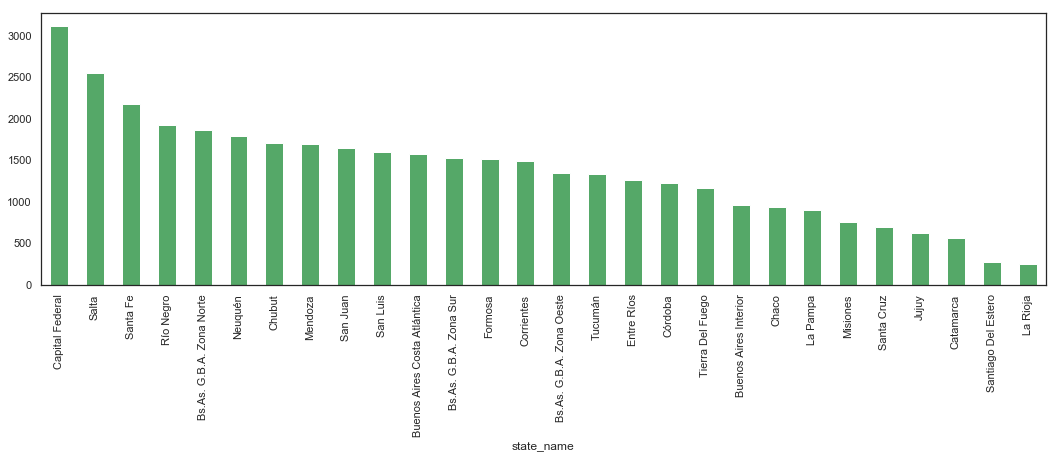

In [27]:
# Graficamos las medias de precios por m2 por Provincia
plot_state_m2 = df.groupby('state_name').describe()
plot_state_m2[('price_usd_per_m2', 'mean')].sort_values(ascending=False).plot.bar(figsize=(18,5), facecolor='g')

In [28]:
# Calculamos el desvio standar de cada provincia
df_std_state = df1.groupby('state_name')['price_usd_per_m2'].std()
df_std_state

state_name
Bs.As. G.B.A. Zona Norte       1894.266
Bs.As. G.B.A. Zona Oeste       1636.373
Bs.As. G.B.A. Zona Sur         1119.508
Buenos Aires Costa Atlántica    916.209
Buenos Aires Interior           707.412
Capital Federal                3681.030
Catamarca                       562.822
Chaco                           574.033
Chubut                         1498.756
Corrientes                      614.172
Córdoba                         859.615
Entre Ríos                     2639.519
Formosa                           8.883
Jujuy                           711.252
La Pampa                        335.627
La Rioja                            nan
Mendoza                        2615.406
Misiones                        653.528
Neuquén                        1406.050
Río Negro                      1556.647
Salta                          4953.591
San Juan                       2182.478
San Luis                       3442.023
Santa Cruz                      534.882
Santa Fe                     

In [29]:
# Definimos una funcion que establece el valor de los outliers
def outlier_value_sup(X):
    value = np.nanmean(X)+(np.nanstd(X)*2)
    return value

In [30]:
# Establecemos los valores de los outliers por Provincia utilizando la funcion anterior con pivot table
# Utilizamos como indice state_name
state_m2_pivot = df.pivot_table(values='price_usd_per_m2',index='state_name',aggfunc= outlier_value_sup)
state_m2_pivot

,price_usd_per_m2
state_name,
Bs.As. G.B.A. Zona Norte,5649.203
Bs.As. G.B.A. Zona Oeste,4622.296
Bs.As. G.B.A. Zona Sur,3764.191
Buenos Aires Costa Atlántica,3406.907
Buenos Aires Interior,2374.075
Capital Federal,10478.834
Catamarca,1583.613
Chaco,2067.181
Chubut,4694.113


De esta forma obtuvimos los puntos de corte que definiran a los valores por encima de estos como outliers

In [31]:
# Reseteamos los indices y state_name vuelve a ser una columna
state_m2_pivot_new=state_m2_pivot.reset_index()
state_m2_pivot_new

,state_name,price_usd_per_m2
0,Bs.As. G.B.A. Zona Norte,5649.203
1,Bs.As. G.B.A. Zona Oeste,4622.296
2,Bs.As. G.B.A. Zona Sur,3764.191
3,Buenos Aires Costa Atlántica,3406.907
4,Buenos Aires Interior,2374.075
5,Capital Federal,10478.834
6,Catamarca,1583.613
7,Chaco,2067.181
8,Chubut,4694.113
9,Corrientes,2718.700


In [32]:
# Utilizamos los puntos de corte calculados por state_name y lo utilizamos para buscar en el df original 
# aquellos valores de ese state_name que estén por arriba de ese valor
state_m2_index=df[(df['state_name']==state_m2_pivot_new.loc[0,'state_name']) &
                    (df['price_usd_per_m2']>state_m2_pivot_new.loc[0,'price_usd_per_m2'])].index.values
df.loc[state_m2_index]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
571,sell,apartment,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,nan,"-34.4046410947,-58.6487591562",-34.405,-58.649,850000.000,USD,14997825.000,850000.000,147.000,147.000,5782.313,5782.313,nan,4.000,nan,http://www.properati.com.ar/15fcd_venta_depart...,"YOO NORDELTA ES UN PROYECTO DE CARLOS OTT, CON...",Condominio Yoo Nordelta - Nordelta - Tigre,https://thumbs4.properati.com/1/BXXKVYTLw03Jds...
610,sell,apartment,La Lucila,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3432310.000,"-34.4941179,-58.4844125",-34.494,-58.484,813000.000,USD,14344978.500,813000.000,100.000,100.000,8130.000,8130.000,nan,5.000,nan,http://www.properati.com.ar/15fer_venta_depart...,Excelente Unidad de 5 ambientes grande de 225 ...,"Exclusivo 5 ambientes 100mt2 ,sobre Libertado...",https://thumbs4.properati.com/3/hBCs9adSV577xO...
628,sell,apartment,Olivos,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430310.000,"-34.5082181,-58.4794478",-34.508,-58.479,250000.000,USD,4411125.000,250000.000,44.000,44.000,5681.818,5681.818,nan,1.000,nan,http://www.properati.com.ar/15ffo_venta_depart...,Departamento tipo Loft en piso 15 de 54 mts to...,Inmejorable departamento en Olivos La Palmera,https://thumbs4.properati.com/4/uTdCLiQla6thgE...
6429,sell,apartment,Vicente López,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,nan,"-34.5317584,-58.4653014",-34.532,-58.465,650000.000,USD,11468925.000,650000.000,90.000,77.000,7222.222,8441.558,nan,2.000,85.000,http://www.properati.com.ar/15u0c_venta_depart...,Excelente dos ambientes con vista abierta al r...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/1/SPs2_UtvjchTUn...
9437,sell,house,Vicente López,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3427504.000,NaN,nan,nan,3500000.000,USD,61755750.000,3500000.000,475.000,nan,7368.421,nan,nan,nan,nan,http://www.properati.com.ar/1645u_venta_casa_v...,Lote en excelente zona de Vicente Lopez. Predo...,"Casa 475m² en San Martin, Av. Del Libertador G...",https://thumbs4.properati.com/8/ORfvXTkzkD40he...
10756,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,nan,NaN,nan,nan,225000.000,USD,3970012.500,225000.000,13.000,55.000,17307.692,4090.909,nan,nan,nan,http://www.properati.com.ar/168yb_venta_casa_n...,LINDISIMO DPTO. DE 2 AMBIENTES EN VENTA CON RE...,"Casa 13m² con Cochera, Tigre, Nordelta, por U$...",https://thumbs4.properati.com/7/Br32nM65HeuTXa...
20250,sell,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Argentina,Bs.As. G.B.A. Zona Norte,3427753.000,NaN,nan,nan,198000.000,USD,3493611.000,198000.000,20.000,120.000,9900.000,1650.000,nan,nan,nan,http://www.properati.com.ar/17c3k_venta_casa_t...,Muy lindo triplex a estrenar de en el complejo...,"Casa 20m² con Cochera en Lopez, Vicente 400, B...",https://thumbs4.properati.com/6/PKoA4oezYVN9I4...
20423,sell,apartment,Victoria,|Argentina|Bs.As. G.B.A. Zona Norte|San Fernan...,Argentina,Bs.As. G.B.A. Zona Norte,3427500.000,NaN,nan,nan,290000.000,USD,5116905.000,290000.000,23.000,72.000,12608.696,4027.778,nan,nan,nan,http://www.properati.com.ar/17cm7_venta_depart...,"Hall, living/comedor con salida a balcÃ³n terr...","Departamento 23m² con Cochera, San Fernando, V...",https://thumbs4.properati.com/1/m-jIXiBTaHTKh5...
20424,sell,apartment,Victoria,|Argentina|Bs.As. G.B.A. Zona Norte|San Fernan...,Argentina,Bs.As. G.B.A. Zona Norte,3427500.000,NaN,nan,nan,295000.000,USD,5205127.500,295000.000,26.000,72.000,11346.154,4097.222,nan,nan,nan,http://www.properati.com.ar

In [33]:
# Encontramos los outliers
df.loc[state_m2_index, 'price_usd_per_m2']

571       5782.313
610       8130.000
628       5681.818
6429      7222.222
9437      7368.421
10756    17307.692
20250     9900.000
20423    12608.696
20424    11346.154
22429     7500.000
23694     5937.500
24925     6800.000
24926     9875.000
24944     7714.286
24992    13461.538
25080    11333.333
25081    11333.333
25138    10428.571
25170     8750.000
25217     6177.778
26989    38478.689
26992    48296.222
26993    37053.443
26994    39776.923
27000    43655.652
27001    45640.000
27004    48296.222
27059    43655.652
27060    39776.923
27061    43655.652
            ...   
107149    5952.381
107162    8928.571
107173   14166.667
107178    6547.619
107183   15714.286
107188   15238.095
107192   14166.667
107196   11785.714
107197   14166.667
107225   13095.238
107233   26666.667
107311    7380.952
107316    6547.619
107333   14880.952
107350    7115.385
107422   13095.238
107431    8309.524
107483    9285.714
107489    9285.714
107493   20119.048
107513    8571.429
107519   104

In [34]:
# Establecemos un nuevo df excuyendo los outliers
df_new = df.drop(state_m2_index)

Vamos a sacar outliers a nivel Barrios (place_name) unicamente en Capital Federal 

In [35]:
df2 = df.loc[(df['state_name'] == 'Capital Federal')]
df2['place_name'].value_counts()

Belgrano                2992
Palermo                 2885
Caballito               2273
Villa Urquiza           1629
Recoleta                1547
Flores                  1354
Villa Crespo            1331
Capital Federal         1297
San Telmo               1216
Almagro                 1165
Barrio Norte            1140
Boedo                    890
Nuñez                    778
Balvanera                667
Puerto Madero            647
San Cristobal            614
Saavedra                 542
Monserrat                538
Palermo Hollywood        532
Floresta                 516
Villa del Parque         488
Villa Luro               432
Barracas                 425
Villa Devoto             420
Mataderos                418
Liniers                  408
Palermo Soho             394
Colegiales               352
Parque Patricios         322
Congreso                 304
                        ... 
Palermo Chico            232
Chacarita                227
Boca                     223
Centro / Micro

In [36]:
# Queremos sacar los place_names con una frecuencia menor a x casos, ya que no tiene sentido calcular la media y std
df2 = df2.groupby('place_name').filter(lambda x: len(x) > 10)
df2.shape

(32306, 25)

In [37]:
# Calculamos la media de cada Barrio 
df_media_place = df2.groupby('place_name')['price_usd_per_m2'].mean()
df_media_place

place_name
Abasto                  2057.529
Agronomía               2088.124
Almagro                 2749.103
Balvanera               1982.249
Barracas                1969.947
Barrio Norte            3098.249
Belgrano                3153.982
Boca                    2068.168
Boedo                  10697.513
Caballito               2467.687
Capital Federal         1772.904
Centro / Microcentro    2555.625
Chacarita               2191.734
Coghlan                 2531.454
Colegiales              2514.793
Congreso                2553.589
Constitución            1794.472
Flores                  2170.858
Floresta                1706.740
Las Cañitas             3476.176
Liniers                 1803.908
Mataderos               1552.250
Monserrat               2087.697
Monte Castro            1846.987
Nuñez                   3246.571
Once                    2145.367
Palermo                 3388.451
Palermo Chico           4797.326
Palermo Hollywood       3174.219
Palermo Soho            3206.126

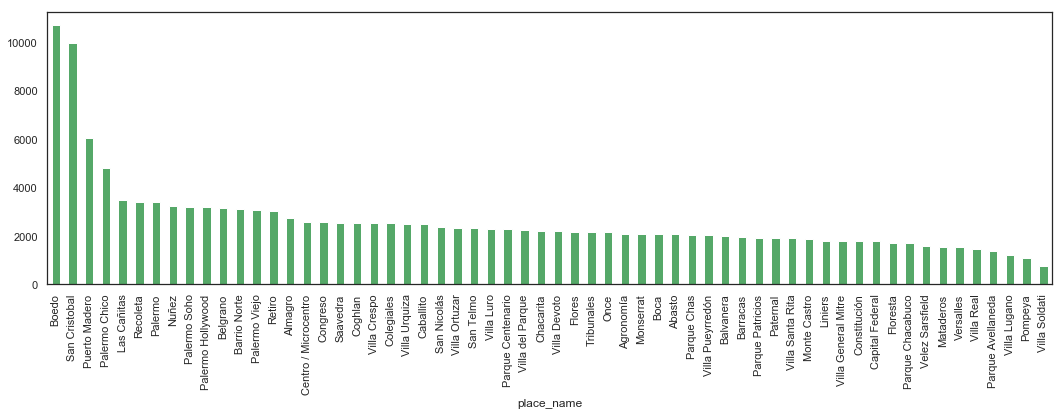

In [38]:
# Graficamos las medias de precios por m2 por Barrio
plot_place_m2 = df2.groupby('place_name').describe()
plot_place_m2[('price_usd_per_m2', 'mean')].sort_values(ascending=False).plot.bar(figsize=(18,5), facecolor='g')

Observando el grafico vemos algo raro ya que no es lo esperado que el valor por m2 sea mayor en Boedo y San Cristobal que en Puerto Madero

In [39]:
# Analizamos la estadistica descriptiva de Boedo
out_boedo = df.loc[df['place_name'] == 'Boedo']
out_boedo['price_usd_per_m2'].describe()

count      800.000
mean     10697.513
std      13188.769
min        789.474
25%       1675.406
50%       7661.667
75%      18322.849
max     206333.333
Name: price_usd_per_m2, dtype: float64

In [40]:
# y de San Cristobal
out_sc = df.loc[df['place_name'] == 'San Cristobal']
out_sc['price_usd_per_m2'].describe()

count     454.000
mean     9952.389
std      9768.989
min       662.791
25%      1815.804
50%      2716.831
75%     21552.420
max     26241.636
Name: price_usd_per_m2, dtype: float64

Analizando estos dos barrios vemos que hay un salto importante en los valores de m2 a partir del percentilo 75%, pero no hay gran diferencia con el maximo por lo tanto podria no tratrse de outliers sino de una zona con gran variabilidad

In [41]:
# Calculamos el desvio standar de cada Barrio
df_std_place = df2.groupby('place_name')['price_usd_per_m2'].std()
df_std_place

place_name
Abasto                   551.401
Agronomía                465.568
Almagro                 3262.402
Balvanera                916.105
Barracas                1608.987
Barrio Norte            1177.912
Belgrano                1112.707
Boca                    3046.695
Boedo                  13188.769
Caballito                983.916
Capital Federal         1453.427
Centro / Microcentro    2393.096
Chacarita                489.729
Coghlan                  931.460
Colegiales               657.565
Congreso                3755.719
Constitución             508.069
Flores                  2181.519
Floresta                 510.182
Las Cañitas              900.755
Liniers                  524.339
Mataderos               1117.327
Monserrat                671.702
Monte Castro             577.965
Nuñez                   1574.786
Once                    2091.527
Palermo                 1875.208
Palermo Chico           2446.462
Palermo Hollywood        906.774
Palermo Soho            1025.099

Repetimos lo hecho para provincia en donde establecimos los valores de corte para los outliers

In [42]:
place_m2_pivot = df2.pivot_table(values='price_usd_per_m2',index='place_name',aggfunc= outlier_value_sup)
place_m2_pivot

,price_usd_per_m2
place_name,
Abasto,3153.824
Agronomía,3000.447
Almagro,9269.975
Balvanera,3812.521
Barracas,5183.386
Barrio Norte,5452.750
Belgrano,5378.872
Boca,8144.417
Boedo,37058.560


In [43]:
place_m2_pivot_new = place_m2_pivot.reset_index()
place_m2_pivot_new

,place_name,price_usd_per_m2
0,Abasto,3153.824
1,Agronomía,3000.447
2,Almagro,9269.975
3,Balvanera,3812.521
4,Barracas,5183.386
5,Barrio Norte,5452.750
6,Belgrano,5378.872
7,Boca,8144.417
8,Boedo,37058.560
9,Caballito,4434.933


In [44]:
place_m2_index=df2[(df2['place_name']==place_m2_pivot_new.loc[0,'place_name']) &
                    (df['price_usd_per_m2']>place_m2_pivot_new.loc[0,'price_usd_per_m2'])].index.values
df.loc[place_m2_index]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail


No encontramos outliers por barrio de precio en dolares por m2

## Por precio en dolares

Repetimos el mismo filtro pero utilizando el precio en dolares ya que no sabemos como fue constriudo el data set, es decir si se utilizó el precio de m2 para determinar el precio final o si este fue cargado de forma independiente.

In [45]:
# Calculamos la media de cada provincia 
df_media_state = df1.groupby('state_name')['price_aprox_usd'].mean()
df_media_state

state_name
Bs.As. G.B.A. Zona Norte       324317.123
Bs.As. G.B.A. Zona Oeste       167545.648
Bs.As. G.B.A. Zona Sur         198555.716
Buenos Aires Costa Atlántica   143430.988
Buenos Aires Interior          183249.997
Capital Federal                269603.183
Catamarca                      725471.707
Chaco                          178583.551
Chubut                         342338.182
Corrientes                     206896.787
Córdoba                        203624.244
Entre Ríos                     148113.820
Formosa                         63463.368
Jujuy                          301584.442
La Pampa                       111053.792
La Rioja                        60954.385
Mendoza                        249705.486
Misiones                       121241.552
Neuquén                        219429.090
Río Negro                      300126.181
Salta                          312755.744
San Juan                       299575.820
San Luis                       282242.500
Santa Cruz             

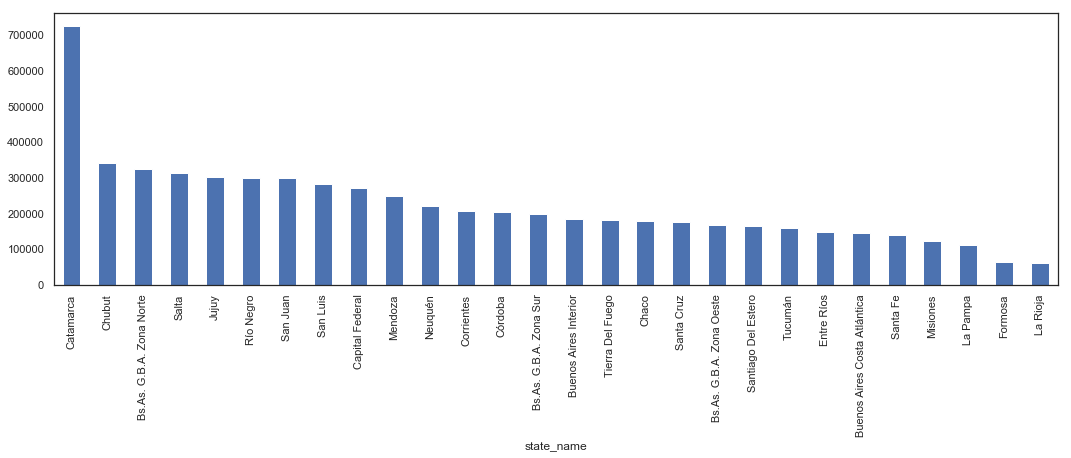

In [46]:
plot_place_precio = df.groupby('state_name').describe()
plot_place_precio[('price_aprox_usd', 'mean')].sort_values(ascending=False).plot.bar(figsize=(18,5), facecolor='b')

Nos llamó la atención el valor medio de catamarca muy por encima del resto de las provincias

In [47]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Para sacar la notacion cientifica
out_cat = df.loc[df['state_name'] == 'Catamarca']
out_cat['price_aprox_usd'].describe()

count        26.000
mean     725471.707
std      563122.327
min       72908.770
25%      152500.000
50%      610000.000
75%     1190000.000
max     1500000.000
Name: price_aprox_usd, dtype: float64

Pasa lo mismo que en los casos anteriores donde a partir del percentilo 75% da un salto importante en precios

In [48]:
# Calculamos el desvio standar de cada provincia
df_std_state = df1.groupby('state_name')['price_aprox_usd'].std()
df_std_state

state_name
Bs.As. G.B.A. Zona Norte        377269.019
Bs.As. G.B.A. Zona Oeste        260654.622
Bs.As. G.B.A. Zona Sur          226005.157
Buenos Aires Costa Atlántica    147074.969
Buenos Aires Interior           198388.373
Capital Federal                 457579.029
Catamarca                       563122.327
Chaco                           135574.589
Chubut                          623040.726
Corrientes                      186483.707
Córdoba                         534022.789
Entre Ríos                      191094.482
Formosa                          31645.111
Jujuy                           320856.808
La Pampa                         76310.445
La Rioja                         16906.053
Mendoza                        1068572.710
Misiones                        129850.530
Neuquén                         329649.465
Río Negro                       874650.672
Salta                           665735.532
San Juan                        281691.394
San Luis                        516782.703


In [49]:
state_precio_pivot=df.pivot_table(values='price_aprox_usd',index='state_name',aggfunc= outlier_value_sup)
state_precio_pivot

,price_aprox_usd
state_name,
Bs.As. G.B.A. Zona Norte,1078839.480
Bs.As. G.B.A. Zona Oeste,688819.346
Bs.As. G.B.A. Zona Sur,650547.328
Buenos Aires Costa Atlántica,437564.691
Buenos Aires Interior,579917.363
Capital Federal,1184745.471
Catamarca,1829845.451
Chaco,445940.245
Chubut,1584614.797


In [50]:
state_precio_pivot_new=state_precio_pivot.reset_index()
state_precio_pivot_new

,state_name,price_aprox_usd
0,Bs.As. G.B.A. Zona Norte,1078839.480
1,Bs.As. G.B.A. Zona Oeste,688819.346
2,Bs.As. G.B.A. Zona Sur,650547.328
3,Buenos Aires Costa Atlántica,437564.691
4,Buenos Aires Interior,579917.363
5,Capital Federal,1184745.471
6,Catamarca,1829845.451
7,Chaco,445940.245
8,Chubut,1584614.797
9,Corrientes,579467.215


In [51]:
state_precio_index=df[(df['state_name']==state_precio_pivot_new.loc[0,'state_name']) &
                    (df['price_aprox_usd']>state_precio_pivot_new.loc[0,'price_aprox_usd'])].index.values
df.loc[state_precio_index]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
58,sell,house,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436508.000,"-34.4739708766,-58.496611619",-34.474,-58.497,3000000.000,USD,52933500.000,3000000.000,1300.000,800.000,2307.692,3750.000,nan,nan,nan,http://www.properati.com.ar/15bve_venta_casa_a...,Magnífica residencia con calidad de construcci...,"Magnífica residencia en Venta, ubicada en el e...",https://thumbs4.properati.com/6/dsYU6-j6mhmHTL...
105,sell,house,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3430813.000,NaN,nan,nan,1700000.000,USD,29995650.000,1700000.000,1280.000,800.000,1328.125,2125.000,nan,nan,nan,http://www.properati.com.ar/15d20_venta_casa_m...,"Impecable casa en MartÃ­nez, vÃ­as a Libertado...","Casa 1280m² con 3 Plantas en Paso, Juan Jose 6...",https://thumbs4.properati.com/6/3PVBopXvgS96IN...
106,sell,house,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436508.000,NaN,nan,nan,3000000.000,USD,52933500.000,3000000.000,1300.000,800.000,2307.692,3750.000,nan,nan,nan,http://www.properati.com.ar/15d22_venta_casa_a...,MagnÃ­fica residencia con calidad de construcc...,"Casa 1300m² con 3 Plantas en Paz, José C. 700,...",https://thumbs4.properati.com/7/lxonCHXJy_Q74g...
107,sell,house,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436508.000,NaN,nan,nan,3100000.000,USD,54697950.000,3100000.000,1300.000,800.000,2384.615,3875.000,nan,nan,nan,http://www.properati.com.ar/15d28_venta_casa_a...,"UNICA propiedad en excelente zona, Libertador ...","Casa 1300m² con 2 Plantas en Paz, José C. 700,...",https://thumbs4.properati.com/8/mW-EZMZlmk9Dk3...
152,sell,house,El Talar,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|El T...,Argentina,Bs.As. G.B.A. Zona Norte,3856531.000,"-34.462657,-58.624077",-34.463,-58.624,1250000.000,USD,22055625.000,1250000.000,nan,612.000,nan,2042.484,nan,7.000,nan,http://www.properati.com.ar/15d96_venta_casa_e...,Corredor Responsable: Matias Castelli - CUCICB...,VENTA CASA EN BARRIO TALAR DE PACHECO TIGRE,https://thumbs4.properati.com/3/neE-sWddfJiexZ...
324,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,nan,NaN,nan,nan,1250000.000,USD,22055625.000,1250000.000,900.000,400.000,1388.889,3125.000,nan,nan,nan,http://www.properati.com.ar/15e1x_venta_casa_n...,LindÃ­sima casa en el Barrio los Castores 1 No...,"Casa 900m² con Cochera, Tigre, Nordelta, por U...",https://thumbs4.properati.com/4/Me9xTdJ2kk6OIt...
505,sell,house,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3430813.000,NaN,nan,nan,1900000.000,USD,33524550.000,1900000.000,1000.000,720.000,1900.000,2638.889,nan,nan,nan,http://www.properati.com.ar/15f0x_venta_casa_m...,MARTINEZ - VIAS A LIBERTADORExcelente casa des...,"Casa 1000m² con Cochera en Las Heras 1400, San...",https://thumbs4.properati.com/2/COxq6Lg2Zv4Y6B...
509,sell,house,Belén de Escobar,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Be...,Argentina,Bs.As. G.B.A. Zona Norte,3436079.000,NaN,nan,nan,1200000.000,USD,21173400.000,1200000.000,45000.000,500.000,26.667,2400.000,nan,nan,nan,http://www.properati.com.ar/15f13_venta_casa_b...,"SEPTIEMBRE Excelente chacra sobre 4,5 Has en B...","Casa 45000m² con 2 Plantas, Escobar, Belén de ...",https://thumbs4.properati.com/3/U1hULgBLpxvLeO...
512,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,nan,NaN,nan,nan,1200000.000,USD,21173400.000,1200000.000,1132.000,nan,1060.071,nan,nan,nan,nan,http://www.properati.com.ar/15f1a_venta_casa_n...,E

In [52]:
df.loc[state_precio_index, 'price_aprox_usd']

58        3000000.000
105       1700000.000
106       3000000.000
107       3100000.000
152       1250000.000
324       1250000.000
505       1900000.000
509       1200000.000
512       1200000.000
525      11000000.000
586       1200000.000
592       1150000.000
601       1800000.000
955       1100000.000
1080      1200000.000
1125      1690000.000
1160      1150000.000
1262      1150000.000
1263      1150000.000
1264      1150000.000
1318      1690000.000
1319      1690000.000
1320      1690000.000
1367      1250000.000
1373      1200000.000
1389      1590000.000
1509      1590000.000
1516      1700000.000
4368      1180000.000
4375      1150000.000
             ...     
112211    1850000.000
112247    1480000.000
112357    1350000.000
112358    1400000.000
112362    1100000.000
112391    1200000.000
113018    1950000.000
113619    1100000.000
113769    1100000.000
114330    1200000.000
116194    1250000.000
116511    1100000.000
116512    2000000.000
116542    1150000.000
116557    

In [53]:
df_new3 = df.drop(state_precio_index)

In [54]:
xx5 = df_new3.groupby('state_name').describe()

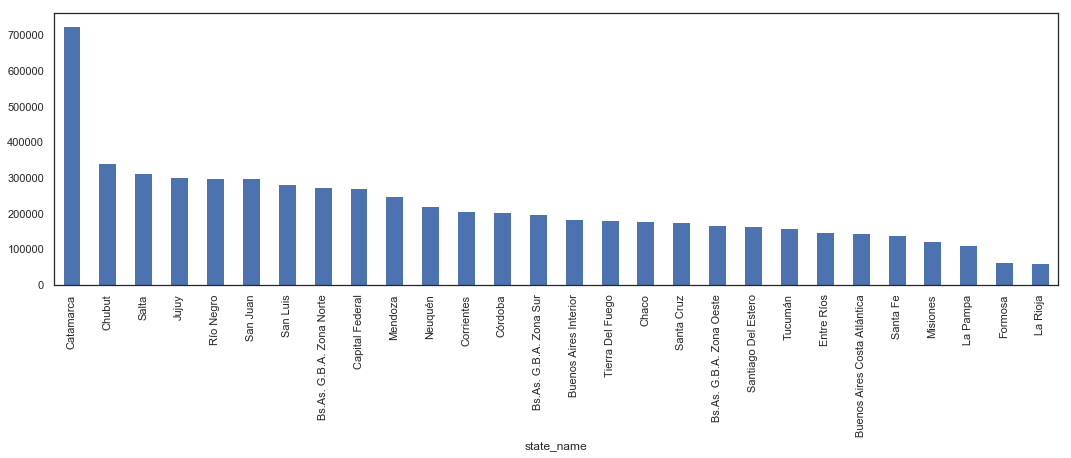

In [55]:
xx5[('price_aprox_usd', 'mean')].sort_values(ascending=False).plot.bar(figsize=(18,5), facecolor='b')

Vamos a sacar outliers a nivel Barrios (place_name) unicamente en Capital Federal 

In [56]:
df3 = df.loc[(df['state_name'] == 'Capital Federal')]
df3['place_name'].value_counts()

Belgrano                2992
Palermo                 2885
Caballito               2273
Villa Urquiza           1629
Recoleta                1547
Flores                  1354
Villa Crespo            1331
Capital Federal         1297
San Telmo               1216
Almagro                 1165
Barrio Norte            1140
Boedo                    890
Nuñez                    778
Balvanera                667
Puerto Madero            647
San Cristobal            614
Saavedra                 542
Monserrat                538
Palermo Hollywood        532
Floresta                 516
Villa del Parque         488
Villa Luro               432
Barracas                 425
Villa Devoto             420
Mataderos                418
Liniers                  408
Palermo Soho             394
Colegiales               352
Parque Patricios         322
Congreso                 304
                        ... 
Palermo Chico            232
Chacarita                227
Boca                     223
Centro / Micro

In [57]:
# Queremos sacar los place_names con una frecuencia menos a x casos
df3 = df3.groupby('place_name').filter(lambda x: len(x) > 10)
df3.shape

(32306, 25)

In [58]:
# Calculamos la media de cada Barrio 
df_media_place = df3.groupby('place_name')['price_aprox_usd'].mean()
df_media_place

place_name
Abasto                  164894.355
Agronomía               168810.135
Almagro                 171977.714
Balvanera               162363.572
Barracas                185618.365
Barrio Norte            312307.618
Belgrano                337227.322
Boca                    189238.883
Boedo                   355070.237
Caballito               184956.458
Capital Federal         426700.042
Centro / Microcentro    226306.962
Chacarita               151673.471
Coghlan                 180499.588
Colegiales              204539.382
Congreso                155949.137
Constitución            123253.408
Flores                  178045.364
Floresta                157941.428
Las Cañitas             345256.205
Liniers                 147001.960
Mataderos               177264.534
Monserrat               155477.013
Monte Castro            175501.351
Nuñez                   373576.460
Once                    234590.859
Palermo                 341732.821
Palermo Chico          1070180.832
Palermo H

In [59]:
xx6 = df3.groupby('place_name').describe()

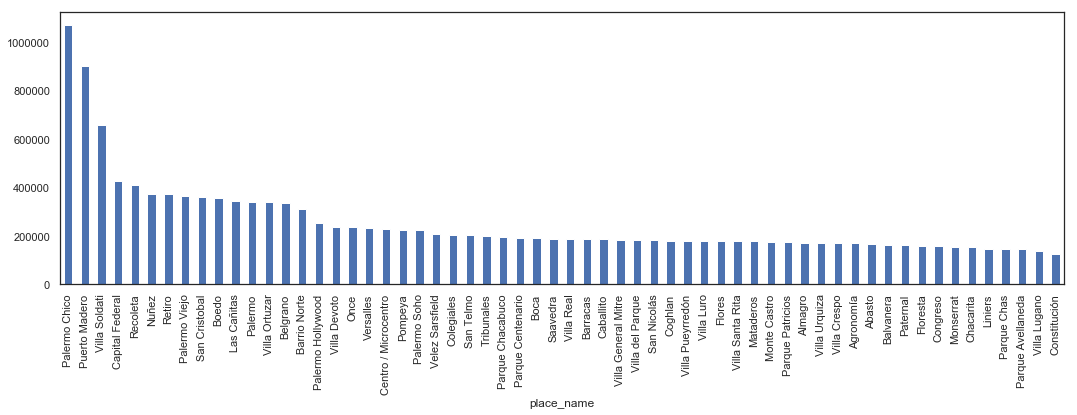

In [60]:
xx6[('price_aprox_usd', 'mean')].sort_values(ascending=False).plot.bar(figsize=(18,5), facecolor='b')

In [61]:
# Calculamos el desvio standar de cada Barrio
df_std_place = df3.groupby('place_name')['price_aprox_usd'].std()
df_std_place

place_name
Abasto                  143842.178
Agronomía                94087.046
Almagro                 154665.675
Balvanera               233393.972
Barracas                144592.433
Barrio Norte            297243.985
Belgrano                372824.489
Boca                    597509.419
Boedo                   412997.346
Caballito               158049.915
Capital Federal         524495.280
Centro / Microcentro    319257.262
Chacarita               194953.961
Coghlan                 132996.756
Colegiales              159131.591
Congreso                182714.029
Constitución            250208.165
Flores                  196982.796
Floresta                105235.940
Las Cañitas             243951.702
Liniers                  98830.621
Mataderos               179109.119
Monserrat               178483.604
Monte Castro            124285.341
Nuñez                   618050.929
Once                    546913.918
Palermo                 401813.798
Palermo Chico          1294993.923
Palermo H

In [62]:
out_vs = df3.loc[df['place_name'] == 'Villa Soldati']
out_vs['price_aprox_usd'].describe()

count        15.000
mean     656375.589
std     2170463.277
min       39000.000
25%       69000.000
50%       86000.000
75%      119055.500
max     8500000.000
Name: price_aprox_usd, dtype: float64

In [63]:
aux_pivot4=df3.pivot_table(values='price_aprox_usd',index='place_name',aggfunc= outlier_value_sup)
aux_pivot4

,price_aprox_usd
place_name,
Abasto,451150.989
Agronomía,354423.916
Almagro,481152.162
Balvanera,628781.489
Barracas,474448.621
Barrio Norte,906504.386
Belgrano,1082729.157
Boca,1381422.559
Boedo,1180583.440


In [64]:
aux_pivot_new4=aux_pivot4.reset_index()
aux_pivot_new4

,place_name,price_aprox_usd
0,Abasto,451150.989
1,Agronomía,354423.916
2,Almagro,481152.162
3,Balvanera,628781.489
4,Barracas,474448.621
5,Barrio Norte,906504.386
6,Belgrano,1082729.157
7,Boca,1381422.559
8,Boedo,1180583.440
9,Caballito,500979.406


In [65]:
aux_index_values4=df[(df['place_name']==aux_pivot_new4.loc[0,'place_name']) &
                    (df['price_aprox_usd']>aux_pivot_new4.loc[0,'price_aprox_usd'])].index.values
df.loc[aux_index_values4]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
58101,sell,store,Abasto,|Argentina|Capital Federal|Abasto|,Argentina,Capital Federal,nan,"-34.6041743,-58.4127926",-34.604,-58.413,1160000.000,USD,20467620.000,1160000.000,620.000,620.000,1870.968,1870.968,nan,nan,nan,http://www.properati.com.ar/19uug_venta_local_...,Local ubicado en el foco comercial del barrio...,CORRIENTES 3300,https://thumbs4.properati.com/0/vJuuXEXi9Oyw-s...
67149,sell,house,Abasto,|Argentina|Capital Federal|Abasto|,Argentina,Capital Federal,nan,NaN,nan,nan,500000.000,USD,8822250.000,500000.000,343.000,nan,1457.726,nan,nan,nan,nan,http://www.properati.com.ar/1aevm_venta_casa_a...,EN UNA EXCELENTE ZONA RESIDENCIAL Y CERCA DE T...,MUY BUENA UBICACIÓN - AMPLIO TERRENO - MUY BUE...,https://thumbs4.properati.com/4/Q-kt0ssSJs6IvA...
87105,sell,PH,Abasto,|Argentina|Capital Federal|Abasto|,Argentina,Capital Federal,nan,NaN,nan,nan,510000.000,USD,8998695.000,510000.000,590.000,470.000,864.407,1085.106,nan,nan,nan,http://www.properati.com.ar/1b5de_venta_ph_aba...,Importante PH con entrada independiente.Antigu...,Venta casa de 7 ambientes en Abasto,https://thumbs4.properati.com/8/cjsR41XyooIu4b...
97680,sell,house,Abasto,|Argentina|Capital Federal|Abasto|,Argentina,Capital Federal,nan,"-34.6167795336,-58.4304936659",-34.617,-58.430,490000.000,USD,8645805.000,490000.000,400.000,280.000,1225.000,1750.000,nan,nan,nan,http://www.properati.com.ar/1bkf9_venta_casa_a...,Excelente casa ubicada sobre la calle Republic...,Casa - Abasto,https://thumbs4.properati.com/3/dFsoA-wFrwk39s...


In [66]:
df.loc[aux_index_values4, 'price_aprox_usd']

58101   1160000.000
67149    500000.000
87105    510000.000
97680    490000.000
Name: price_aprox_usd, dtype: float64

In [67]:
df_new4 = df.drop(aux_index_values4)

In [68]:
df_new5 = df3.drop(aux_index_values4)

In [69]:
xx7 = df_new5.groupby('place_name').describe()

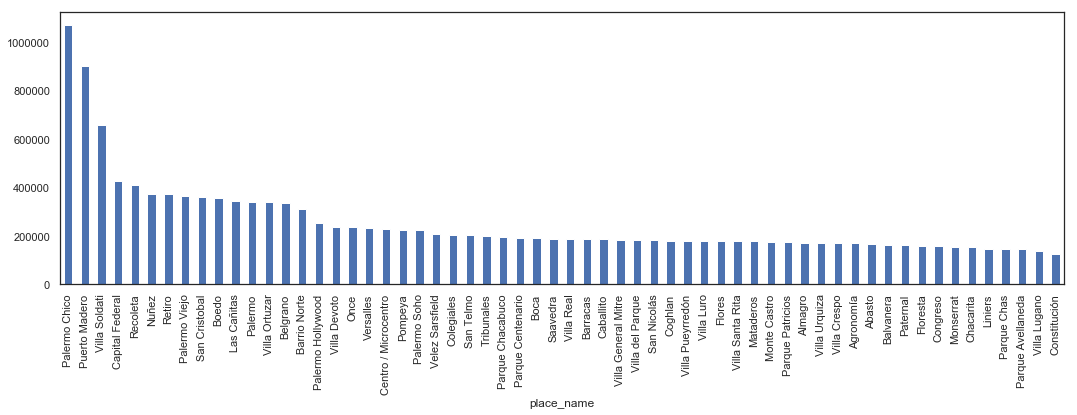

In [70]:
xx6[('price_aprox_usd', 'mean')].sort_values(ascending=False).plot.bar(figsize=(18,5), facecolor='b')

## Por superficies

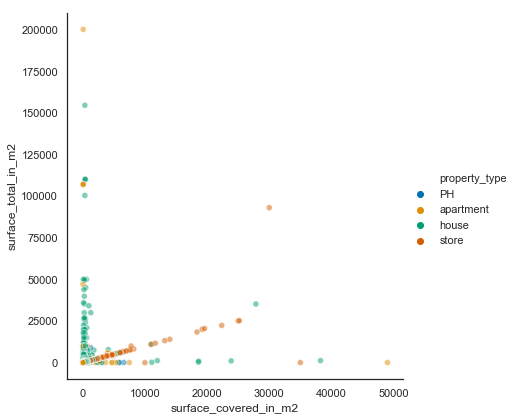

In [71]:

sns.relplot(x="surface_covered_in_m2", 
            y="surface_total_in_m2", 
            hue="property_type", 
            sizes=(40, 400), 
            alpha=.5, 
            palette="colorblind",
            height=6, 
            data=df)

## Situacion de Nulls:

Voy a trabajar con las columnas que puedan aportar información referente a las superficies de las propiedades:

In [72]:
df[['surface_total_in_m2',\
    'surface_covered_in_m2',\
    'price_usd_per_m2', \
    'price_per_m2']].head()

,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
0,55.000,40.000,1127.273,1550.000
1,nan,nan,nan,nan
2,55.000,55.000,1309.091,1309.091
3,nan,nan,nan,nan
4,35.000,35.000,1828.571,1828.571


### Pirmero de forma individual:

In [73]:
#Cantidad de nulls en surface_total_in_m2
df.surface_total_in_m2.isnull().sum() 

39328

In [74]:
#Cantidad de nulls en surface_covered_in_m2
df.surface_covered_in_m2.isnull().sum()

19907

In [75]:
#Cantidad de nulls en price_usd_per_m2
df.price_usd_per_m2.isnull().sum()

52603

In [76]:
#Cantidad de nulls en price_per_m2
df.price_per_m2.isnull().sum()

33562

 ### Ahora de forma cruzada:

In [77]:
#Primero que nulls comparten las dos primeras columnas (surface_total_in_m2 y
#surface_covered_in_m2):

df[(df.surface_total_in_m2.isnull() & \
    df.surface_covered_in_m2.isnull())].shape

(12369, 25)

In [78]:
#Voy a confirmar que la columna price_usd_per_m2 no aportaria 
#a la zona de nulls anterior:

df[(df.surface_total_in_m2.isnull() & \
    df.surface_covered_in_m2.isnull() & \
    df.price_usd_per_m2.notnull())].shape

(0, 25)

In [79]:
#Voy a confirmar que la columna price_per_m2 no aportaria 
#a la zona de nulls anterior:

df[(df.surface_total_in_m2.isnull() & \
    df.surface_covered_in_m2.isnull() & \
    df.price_per_m2.notnull())].shape

(0, 25)

In [80]:
#Ahora busco los nulos en la segunda columna surface_covered_in_m2 que pueden
#ser salvados por la primer columna surface_total_in_m2:

df[(df.surface_total_in_m2.notnull() & \
    df.surface_covered_in_m2.isnull())].shape

(7538, 25)

In [81]:
#Por ultimo busco los nulls en la primera columna surface_total_in_m2 que pueden 
#ser salvados por la segunda columna surface_covered_in_m2:

df[(df.surface_total_in_m2.isnull() & \
    df.surface_covered_in_m2.notnull())].shape

(26959, 25)

## Mapa de nulls:

![title](map_null_sup.png)

Del análisis anterior obtenemos tres tipos de datos:

1 - Los Comunes

2 - Los Salvables

3 - Los perdidos

En el caso de los perdidos, no es el final del camino, aun se puede recuperar información de la columna de "Descripción" mediante expresiones regulares, dado lo limitado del tiempo y que otros compañeros de grupo actualmente se ocupan de esa tarea (REGEX), me voy a limitar de marcarlos y a seguir adelante.


## Outliers :

Antes de resolver la situación de los nulls, voy a tratar con los outliers de forma particular con cada columna, para luego poder obtener una relación limpia entre ambas columnas y poder salvar los nulls.
Primero voy a agrupar por el tipo de propiedad, y después voy a estudiar la distribución en cada caso, y finalmente usare un criterio de filtrado.

In [82]:
#Primero para surface_total_in_m2 :
df.groupby('property_type').describe()['surface_total_in_m2']

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3601.000,122.297,298.388,0.000,61.000,90.000,141.000,14742.000
apartment,51085.000,96.606,1602.659,0.000,43.000,59.000,87.000,200000.000
house,24505.000,507.439,2135.549,0.000,180.000,278.000,475.000,154438.000
store,2701.000,494.512,2261.117,0.000,60.000,154.000,360.000,93000.000


Se buscan valores de frontera que dejen fuera muchos datos, pero al mismo tiempo tengan algún sentido:

In [83]:
#De ser la frontera superior 2000m2 dejariamos afuera 633 casos:
df[df.surface_total_in_m2 > 2000].shape

(633, 25)

In [84]:
#En el caso de la frontera inferior deseche casos con menos de 25m2, dejando
#afuera 1003 casos:
df[df.surface_total_in_m2 < 25].shape

(1003, 25)

En el proximo cuadro, primero voy a generar las mascaras para filtrar los casos vistos arriba, voy a remplazar estos outliers por ceros primero, luego los volvere nulls, y finalmente mas adelante los dropeare:

In [85]:
mask1 = df[df.surface_total_in_m2 > 2000]['surface_total_in_m2']

df.loc[mask1.index, 'surface_total_in_m2'] = 0

mask2 = df[df.surface_total_in_m2 < 25]['surface_total_in_m2']

df.loc[mask2.index, 'surface_total_in_m2'] = 0

df.surface_total_in_m2.replace(0,np.nan, inplace=True)

In [86]:
#Por ultimo revisamos los nuevos valores:
df.groupby('property_type').describe()['surface_total_in_m2']

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,3578.000,116.379,87.830,25.000,62.000,90.000,141.000,1200.000
apartment,50357.000,77.624,66.935,25.000,44.000,60.000,88.000,2000.000
house,23853.000,378.056,314.130,25.000,180.000,272.000,450.000,2000.000
store,2468.000,280.980,334.762,25.000,68.000,157.000,338.250,2000.000


In [87]:
#Ahora pasamos a la otra columnma surface_covered_in_m2 :
df.groupby('property_type').describe()['surface_covered_in_m2']

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4913.000,87.659,138.844,1.000,51.000,73.000,104.000,6610.000
apartment,59735.000,74.039,805.139,0.000,40.000,52.000,76.000,187000.000
house,33510.000,217.845,420.279,1.000,120.000,180.000,260.000,38240.000
store,3155.000,420.389,1562.609,1.000,42.000,120.000,300.000,35000.000


In [88]:
#Se usan criterios similares a los de arriba:
df[df.surface_covered_in_m2 > 2000].shape

(180, 25)

In [89]:
df[df.surface_covered_in_m2 < 25].shape

(2554, 25)

In [90]:
mask1 = df[df.surface_covered_in_m2 > 2000]['surface_covered_in_m2']

df.loc[mask1.index, 'surface_covered_in_m2'] = 0

mask2 = df[df.surface_covered_in_m2 < 25]['surface_covered_in_m2']

df.loc[mask2.index, 'surface_covered_in_m2'] = 0

df.surface_covered_in_m2.replace(0,np.nan, inplace=True)

In [91]:
df.groupby('property_type').describe()['surface_covered_in_m2']

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
PH,4630.000,89.233,60.788,25.000,55.000,75.000,107.000,1298.000
apartment,58726.000,67.716,53.258,25.000,40.000,53.000,77.000,2000.000
house,32591.000,214.114,137.481,25.000,122.000,184.000,260.000,2000.000
store,2632.000,256.954,317.960,25.000,60.000,140.000,307.000,2000.000


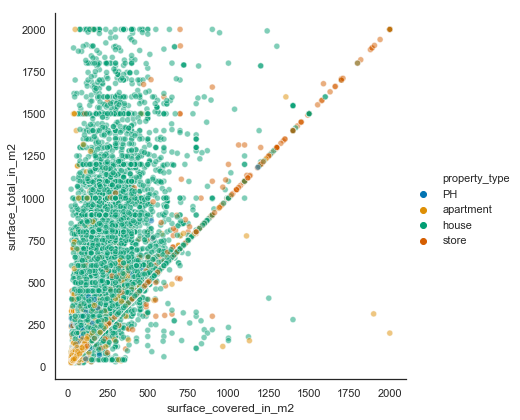

In [92]:
sns.relplot(x="surface_covered_in_m2", 
            y="surface_total_in_m2", 
            hue="property_type", 
            sizes=(40, 400), 
            alpha=.5, 
            palette="colorblind",
            height=6, 
            data=df)

### Relación surface_total_in_m2 / surface_total_in_m2 :

Ahora libres de outliers vamos a estudiar que relacion existe entre estas dos columnas, teniendo en cuenta el tipo de propiedad:

In [93]:
#Sacamos un coeficiente con la media de cada tipo de propiedad:
rel_sup_PH = df.loc[df.property_type == 'PH']['surface_total_in_m2'].mean()/df.loc[df.property_type == 'PH']['surface_covered_in_m2'].mean()
rel_sup_apartment = df.loc[df.property_type == 'apartment']['surface_total_in_m2'].mean()/df.loc[df.property_type == 'apartment']['surface_covered_in_m2'].mean()
rel_sup_house = df.loc[df.property_type == 'house']['surface_total_in_m2'].mean()/df.loc[df.property_type == 'house']['surface_covered_in_m2'].mean()
rel_sup_store = df.loc[df.property_type == 'store']['surface_total_in_m2'].mean()/df.loc[df.property_type == 'store']['surface_covered_in_m2'].mean()

### Salvando Nulos:

Ahora con los coeficientes anteriores y filtrando a los nulos salvables en este primer caso, los nulos de surface_total_in_m2 que cuentan con un valor en surface_covered_in_m2, obtenemos un nuevo valor de surface_total_in_m2 :


In [94]:
mask1 = df.surface_total_in_m2.loc[(df.property_type == 'PH')&(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2.notnull())]
mask2 = df.surface_total_in_m2.loc[(df.property_type == 'apartment')&(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2.notnull())]
mask3 = df.surface_total_in_m2.loc[(df.property_type == 'house')&(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2.notnull())]
mask4 = df.surface_total_in_m2.loc[(df.property_type == 'store')&(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2.notnull())]

df.loc[mask1.index, 'surface_total_in_m2'] = rel_sup_PH * df.surface_covered_in_m2.loc[(df.property_type == 'PH')&(df.surface_total_in_m2.isnull()&(df.surface_covered_in_m2.notnull()))]
df.loc[mask2.index, 'surface_total_in_m2'] = rel_sup_apartment * df.surface_covered_in_m2.loc[(df.property_type == 'apartment')&(df.surface_total_in_m2.isnull()&(df.surface_covered_in_m2.notnull()))]
df.loc[mask3.index, 'surface_total_in_m2'] = rel_sup_house * df.surface_covered_in_m2.loc[(df.property_type == 'house')&(df.surface_total_in_m2.isnull()&(df.surface_covered_in_m2.notnull()))]
df.loc[mask4.index, 'surface_total_in_m2'] = rel_sup_store * df.surface_covered_in_m2.loc[(df.property_type == 'store')&(df.surface_total_in_m2.isnull()&(df.surface_covered_in_m2.notnull()))]

En esta segunda etapa se hace el proceso inverso, y los nulos de surface_covered_in_m2 son tratados con los valores de surface_total_in_m2 y se hace uso inverso del coeficiente correspondiente, para obtener un nuevo valor de surface_covered_in_m2 :

In [95]:
mask1 = df.surface_covered_in_m2.loc[(df.property_type == 'PH')&(df.surface_total_in_m2.notnull())&(df.surface_covered_in_m2.isnull())]
mask2 = df.surface_covered_in_m2.loc[(df.property_type == 'apartment')&(df.surface_total_in_m2.notnull())&(df.surface_covered_in_m2.isnull())]
mask3 = df.surface_covered_in_m2.loc[(df.property_type == 'house')&(df.surface_total_in_m2.notnull())&(df.surface_covered_in_m2.isnull())]
mask4 = df.surface_covered_in_m2.loc[(df.property_type == 'store')&(df.surface_total_in_m2.notnull())&(df.surface_covered_in_m2.isnull())]

df.loc[mask1.index, 'surface_covered_in_m2'] = df.surface_total_in_m2.loc[(df.property_type == 'PH')&(df.surface_total_in_m2.notnull()&(df.surface_covered_in_m2.isnull()))] / rel_sup_PH
df.loc[mask2.index, 'surface_covered_in_m2'] = df.surface_total_in_m2.loc[(df.property_type == 'apartment')&(df.surface_total_in_m2.notnull()&(df.surface_covered_in_m2.isnull()))] / rel_sup_apartment
df.loc[mask3.index, 'surface_covered_in_m2'] = df.surface_total_in_m2.loc[(df.property_type == 'house')&(df.surface_total_in_m2.notnull()&(df.surface_covered_in_m2.isnull()))] / rel_sup_house
df.loc[mask4.index, 'surface_covered_in_m2'] = df.surface_total_in_m2.loc[(df.property_type == 'store')&(df.surface_total_in_m2.notnull()&(df.surface_covered_in_m2.isnull()))] / rel_sup_store

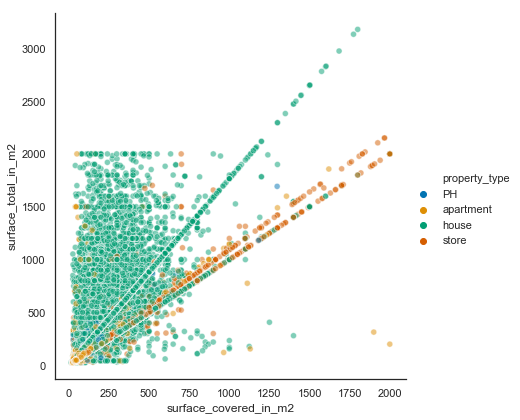

In [96]:
sns.relplot(x="surface_covered_in_m2", 
            y="surface_total_in_m2", 
            hue="property_type", 
            sizes=(40, 400), 
            alpha=.5, 
            palette="colorblind",
            height=6, 
            data=df)

### Que hacer con los nulos restantes:

Se me ocurren tres caminos para tratar los últimos nulos:

1- Buscar mediante expresiones regulares en la columna de descripción, y reiniciar el ciclo de outliers, dependerá del tiempo que nos quede.

2- Colocar el valor medio, teniendo en cuenta el tipo de propiedad.

3- Dropearlos, son 15229 casos, que representa el 12,5% del total de la base de datos.


### En caso de elegir la primer opción:

Se filtran y separan los nulos restantes para pasarle al equipo de expresiones regulares, con el fin de recuperar mas info de la columna "description" 

In [97]:
# nst = df.surface_total_in_m2.loc[(df.surface_total_in_m2.isnull()) & (df.surface_covered_in_m2.isnull())]
# nsc = df.surface_covered_in_m2.loc[(df.surface_total_in_m2.isnull()) & (df.surface_covered_in_m2.isnull())]

### En caso de elegir la segunda opción:

Como trabajamos anteriormente, primero armamos las mascaras teniendo en cuenta que ahora buscamos los nulos en surface_total_in_m2 y en surface_covered_in_m2, en esta primera etapa, completaremos la columna surface_total_in_m2, con los valores medios segun el tipo de propiedad:

In [98]:
mask1 = df.surface_total_in_m2.loc[(df.property_type == 'PH')&(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2.isnull())]
mask2 = df.surface_total_in_m2.loc[(df.property_type == 'apartment')&(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2.isnull())]
mask3 = df.surface_total_in_m2.loc[(df.property_type == 'house')&(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2.isnull())]
mask4 = df.surface_total_in_m2.loc[(df.property_type == 'store')&(df.surface_total_in_m2.isnull())&(df.surface_covered_in_m2.isnull())]

df.loc[mask1.index, 'surface_total_in_m2'] = df.loc[df.property_type == 'PH']['surface_total_in_m2'].mean()
df.loc[mask2.index, 'surface_total_in_m2'] = df.loc[df.property_type == 'apartment']['surface_total_in_m2'].mean()
df.loc[mask3.index, 'surface_total_in_m2'] = df.loc[df.property_type == 'house']['surface_total_in_m2'].mean()
df.loc[mask4.index, 'surface_total_in_m2'] = df.loc[df.property_type == 'store']['surface_total_in_m2'].mean()

En esta segunda etapa tendremos dos cosas en cuenta, la primera, en la mascara ya no sera necesario filtrar con los nulls de surface_total_in_m2 pues esta columna ya no tiene desde el cuadro anterior, y la segunda, al valor medio que colocaremos le aplicaremos el coeficiente anteriormente calculado :

In [99]:
mask1 = df.surface_covered_in_m2.loc[(df.property_type == 'PH')&(df.surface_covered_in_m2.isnull())]
mask2 = df.surface_covered_in_m2.loc[(df.property_type == 'apartment')&(df.surface_covered_in_m2.isnull())]
mask3 = df.surface_covered_in_m2.loc[(df.property_type == 'house')&(df.surface_covered_in_m2.isnull())]
mask4 = df.surface_covered_in_m2.loc[(df.property_type == 'store')&(df.surface_covered_in_m2.isnull())]

df.loc[mask1.index, 'surface_covered_in_m2'] = df.loc[df.property_type == 'PH']['surface_covered_in_m2'].mean()/rel_sup_PH
df.loc[mask2.index, 'surface_covered_in_m2'] = df.loc[df.property_type == 'apartment']['surface_covered_in_m2'].mean()/rel_sup_apartment
df.loc[mask3.index, 'surface_covered_in_m2'] = df.loc[df.property_type == 'house']['surface_covered_in_m2'].mean()/rel_sup_house
df.loc[mask4.index, 'surface_covered_in_m2'] = df.loc[df.property_type == 'store']['surface_covered_in_m2'].mean()/rel_sup_store


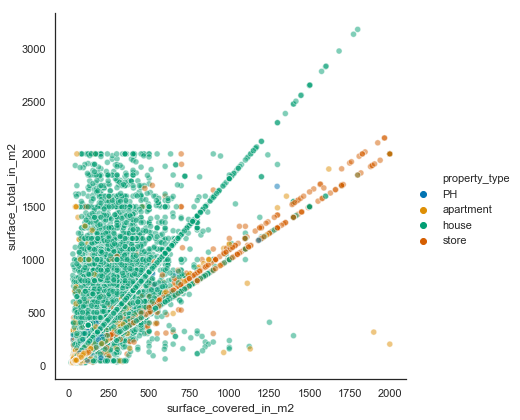

In [100]:
sns.relplot(x="surface_covered_in_m2", 
            y="surface_total_in_m2", 
            hue="property_type", 
            sizes=(40, 400), 
            alpha=.5, 
            palette="colorblind",
            height=6, 
            data=df)

### En caso de la tercer opción:

Se filtran y separan los nulos restantes para finalmente dropearlos.

In [101]:
# nst = df.surface_total_in_m2.loc[(df.surface_total_in_m2.isnull()) & (df.surface_covered_in_m2.isnull())]
# df.drop(nst.index, inplace=True)

# 5. Gráficos

In [102]:
import seaborn as sns
sns.set(style="white")

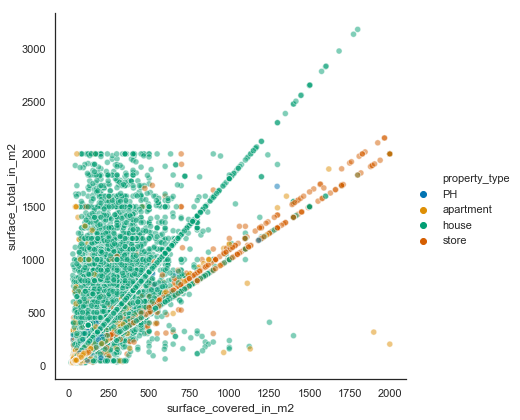

In [103]:
sns.relplot(x="surface_covered_in_m2", 
            y="surface_total_in_m2", 
            hue="property_type", 
            sizes=(40, 400), 
            alpha=.5, 
            palette="colorblind",
            height=6, 
            data=df)

## Análisis de precios por zona

In [104]:
dfa = df[['place_name','price_aprox_usd']].dropna() # Sacamos los nulos

In [105]:
# Queremos sacar los place_names con una frecuencia menos a x casos
dfa = dfa.groupby('place_name').filter(lambda x: len(x) > 100)
dfa.shape

(89840, 2)

In [106]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Para sacar la notacion cientifica

In [107]:
xx = dfa.groupby('place_name').describe().astype(int)

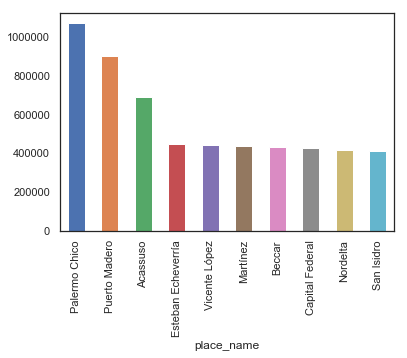

In [108]:
xx[('price_aprox_usd', 'mean')].sort_values(ascending=False).head(10).plot.bar()

In [109]:
dfb = df[['property_type','price_aprox_usd']].dropna() # Sacamos los nulos

In [110]:
# Queremos sacar los place_names con una frecuencia menos a x casos
dfb = dfb.groupby('property_type').filter(lambda x: len(x) > 100)
dfb.shape

(100810, 2)

In [111]:
xxB = dfb.groupby('property_type').describe().astype(int)

In [112]:
xxB

price_aprox_usd                                                \
                        count    mean     std   min     25%     50%     75%   
property_type                                                                 
PH                       5220  147689  148894  5047   85000  120000  165000   
apartment               59616  187406  316218  4666   80000  119000  190000   
house                   32715  329696  458208     0  140000  240000  384450   
store                    3259  440257  761393  4952   95000  210000  450000   

                         
                    max  
property_type            
PH              2800000  
apartment      46545445  
house          25000000  
store          13000000

In [113]:
# titanic = sns.load_dataset("titanic")
# sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d",
#               order=titanic.deck.value_counts().iloc[:3].index)

# grafico de cantidad por tipo y por barrio  

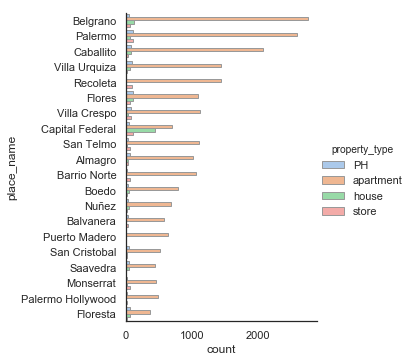

In [115]:
df_caba = df[df.state_name =='Capital Federal']
sns.catplot(y="place_name", hue="property_type", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_caba, order=df_caba.place_name.value_counts().iloc[:20].index);

In [117]:
#xxB["property_type"].value_countsa().plot(kind='hist')

KeyError: 'property_type'

In [118]:
#xxB[('property_type')].value_counts().plot(kind='bar')

KeyError: 'property_type'

In [119]:
#xxB[('property_type')].plot.bar()

KeyError: 'property_type'

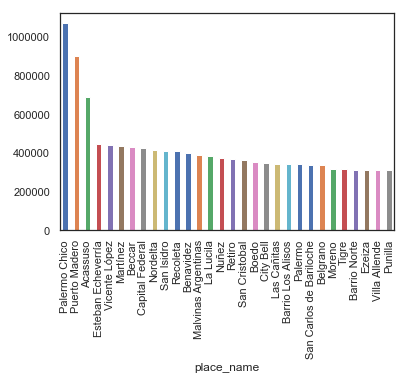

In [120]:
xx[('price_aprox_usd', 'mean')].sort_values(ascending=False).head(30).plot.bar()

# 4. Sacar las mayusculas y ñs:

Vimos que para poder hacer un manejo más fácil de los datos era preferible sacar las mayúsculas y las ñ. 
Para ello generamos una funcion inicial y despues vimos como poder aplicarla de forma sistematica a todas 
las columnas

### Formulación de la función y testeo  

Defino funcion de encoding

In [121]:
def quitar_caracteres(entrada):
    return str.lower(unidecode.unidecode(entrada))

In [ ]:
# Pruebo la funcion en un dataset pequeño para evaluar que corra bien
# dfdos=pd.DataFrame(df.loc[:6,['property_type','place_name']])
# dfdos
# dfdos.applymap(quitar_caracteres)

Esta prueba nos permite ver que la función realiza correctamente lo que tiene que hacer con el texto que encuentra. 

Lo que ahora tenemos que evaluar es por qué tira error cuando se aplica a la columna de descripción

In [ ]:
# Ahora pruebo la función con la columna descripción
# dftres=pd.DataFrame(df.loc[:6,['description']])
# dftres
# dftres.applymap(quitar_caracteres)

La función se ejecuta correctamente.
Pero cuando corremos toda la columna nos tira error

In [ ]:
# dfcuatro= pd.DataFrame(df['description'])
# dfcuatro.applymap(quitar_caracteres)

El error que nos tira es que encuentra una entrada que tiene "float" como tipo de dato y que el método "encode" no funciona con esa clase de dato. 
Una hipótesis de por qué puede generarse este error es que haya valores "nan" en la columna descripción y que, dado que estos son tipo "float", la función tira un error. 
Nos fijamos primero si la columna tiene valores tipo nan. Encontramos que si tiene nans.

In [ ]:
#dfcuatro['description'].isnull().sum()

### Función terminada y aplicación

Generamos el codigo final que gracias a la condicion de que el tipo de lo que esta dentro de la columna sea string
evita esos casos donde es float y romperia el codigo

In [122]:
def quitar_caracteres(column):
    for i in range(len(column)):
        if type(column[i]) == str:
            column[i] = str.lower(unidecode.unidecode(column[i]))

Corremos el codigo para las columnas que tienen informacion en string, donde es util hacerlo

In [ ]:
# quitar_caracteres(df["place_name"])
# quitar_caracteres(df["place_with_parent_names"])
# quitar_caracteres(df["country_name"])
# quitar_caracteres(df["description"])
# quitar_caracteres(df["title"])

Lo dejamos comentado porque tarda 45 minutos en correr pero dejamos el DataFrame con este código corrido en df1 y empezamos a trabajar con el mismo.

# 5. Regex

Generamos una función para analizar que palabras clave valia la pena buscar

In [123]:
def existe_clave(key, columna, df_aux):
    m = []
    for i in range(len(df_aux.index)):
        if type(df_aux[columna][i]) == str :
            if key in df_aux[columna][i]:
                m.append(True)
            else:
                m.append(False)
    return sum(m)

In [ ]:
# existe_clave("salon de usos multiples", "description", properatti1)
# existe_clave("gim", "description", properatti1)
# existe_clave("gym", "description", properatti1)
# existe_clave("gimnasio", "description", properatti1)
# existe_clave("pileta", "description", properatti1)
# existe_clave("piscina", "description", properatti1)
# existe_clave("solarium", "description", properatti1)
# existe_clave("garage", "description", properatti1)
# existe_clave("cochera", "description", properatti1)
# existe_clave("baulera", "description", properatti1)
# existe_clave("laundry", "description", properatti1)
# existe_clave("lavadero", "description", properatti1)
# existe_clave("sauna", "description", properatti1)
#print("mts²:", existe_clave("mts", "description", properatti1))
#print("metros:", existe_clave("metros 2", "description", properatti1))
#print("$:", existe_clave(" $ ", "title", properatti))


## Función de regex

Esta función nos permitirá pasar por toda la columna y obtener la información pedida por el pattern que le pasamos y que se guarde en un DataFrame nuevo

In [128]:
def busca_claves(pattern, columna, df):
    regex = re.compile(pattern)
    m = pd.DataFrame([regex.findall(n) for n in df[columna] if type(df[columna] == str)])
    return m

Los patterns que generamos para hacer los regex.

In [129]:
pattern_amb = r"(\d*\w*)\s*amb"
pattern_hab = r"(\d*\w*)\s*habitacion|(\d*\w*)\s?cuarto|(\d*\w*)\s?dorm|(\d*\w*)\s?pieza"
pattern_amen = r"(pileta)|(piscina)|(SUM)|(laundry)|(lavadero)|(terraza)|(solarium)|(baulera)|(sauna)|(gimnasio)|(salon de usos multiples)|(cochera)|(garage)|(gim)|(gym)"
pattern_casa = r"(casa)|(departamento)|(triplex)|(duplex)|(frente)|(contrafrente)|(PH)|(chalet)"
pattern_superficie = r"(\d*)\,?\d*\s?(?:m²|mts\s?2|metros\s?2|mts²|m2|metros\s?cuadrado|mts\s?cuadrado)"
pattern_precio_usd = r"(\d+\.?\,?\d+\.?\,?\d+)\s?u[$s]\w?|u[$s]\w?\s*(\d+\.?\,?\d+\.?\,?\d+)"
pattern_precio = r"(\d+\.?\,?\d+\.?\,?\d+)\s?\$|\$\s*(\d+\.?\,?\d+\.?\,?\d+)"

Generamos variables con la funcion corrida por pattern y por columna

In [ ]:
ambientes_tit = busca_claves(pattern_amb, "title", df1)
ambientes_des = busca_claves(pattern_amb, "description", df1)

habitaciones_tit = busca_claves(pattern_hab, "title", df1)
habitaciones_des = busca_claves(pattern_hab, "description", df1)

amenities_tit = busca_claves(pattern_amen, "title", df1)
amenities_des = busca_claves(pattern_amen, "description", df1)

tipo_tit = busca_claves(pattern_casa, "title", df1)
tipo_des = busca_claves(pattern_casa, "description", df1)

superficie_tit = busca_claves(pattern_superficie, "title", df1)
superficie_des = busca_claves(pattern_superficie, "description", df1)

precio_usd_tit = busca_claves(pattern_precio_usd, "title", df1)
precio_usd_des = busca_claves(pattern_precio_usd, "description", df1)

precio_tit = busca_claves(pattern_precio, "title", df1)
precio_des = busca_claves(pattern_precio, "description", df1)

In [ ]:
# print(ambientes_tit.head(10))
# print(ambientes_des.head(10))
# print(habitaciones_tit.head(10))
# print(habitaciones_des.head(10))
# print(precio_usd_tit)
# print(precio_usd_des.head(10))
# print(precio_tit)
# print(precio_des.head(10))


# print(superficie_tit)
# print(superficie_des.iloc[263])
# print(superficie_des.sample(10))
# print(superficie_tit.notnull().sum().sum())
# print(superficie_des.notnull().sum().sum())
# corrobore que hay bastante informacion por lo tanto el regex anda

Generamos una función para dejar todos los DataFrames generados solo con una columna y que dentro contengan los valores ūnicos solos (sin estar dentro de una tupla o lista con muchos nulls) o en listas

In [ ]:
def tuples2lists(df):
    for i in range(len(df.index)):
        l = []
        for j in range(len(df.columns)):
            if df.iloc[i,j] != None:
                if type(df.iloc[i,j]) == str:
                    l.append(df.iloc[i,j])
                else:
                    for h in df.iloc[i,j]:
                        if h != "":
                            l.append(h)
        if len(l) == 0:
            df.iloc[i,0] = None
        elif len(l) == 1:
            df.iloc[i,0] = l[0]
        else:
            df.iloc[i,0] = l
    df = df[[0]]
    return df

In [ ]:
ambientes_tit1 = tuples2lists(ambientes_tit) 
ambientes_des1 = tuples2lists(ambientes_des)

habitaciones_tit1 = tuples2lists(habitaciones_tit)  
habitaciones_des1 = tuples2lists(habitaciones_des) 

amenities_tit1 = tuples2lists(amenities_tit) 
amenities_des1 = tuples2lists(amenities_des)  

tipo_tit1 = tuples2lists(tipo_tit) 
tipo_des1 = tuples2lists(tipo_des) 

superficie_tit1 = tuples2lists(superficie_tit)  
superficie_des1 = tuples2lists(superficie_des) 

precio_usd_tit1 = tuples2lists(precio_usd_tit)  
precio_usd_des1 = tuples2lists(precio_usd_des) 

precio_tit1 = tuples2lists(precio_tit)  
precio_des1 = tuples2lists(precio_des)

### Rutina para reemplazar literales a numeros

Generamos una función que nos pase los valores dentro de los DataFrames de regex de ambientes y habitaciones a números

In [ ]:
dic = {'mono': 1, 'un':1, 'una': 1, 'uno':1, 'dos':2, 'tres':3, 'cuatro':4, 'cinco':5 ,'seis':6 ,'siete':7}
lista_prop = ['mono','un', 'una', 'uno','dos','tres','cuatro','cinco','seis','siete']

def cambiar_x_nros(df):
    return pd.DataFrame([x if x not in lista_prop else dic.get(x) for x in df1['ambientes']])